<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/Estadistica/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística para Ciencia de los Datos
# Trabajo práctico 2

- Professor: Jorge Castro.

- Student:  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- September 29th, 2019   

In [0]:
# Libraries required for the exercises
import torch as torch
import numpy as np
import random
import math

from scipy import stats
import statsmodels.api as sm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy import linalg as linalg

# Pandas library for reading csvs
import pandas as pd


# 1) Utilizando la columna Depth.




Primer Análisis: Se escogió la variable cuantitativa Depth.
Depth data:  [61.9, 62.9, 61.7, 62.1, 60.6, 62.5, 62.8, 60.0, 63.0, 62.4, 62.9, 59.2, 61.3, 62.3, 60.4, 61.9, 58.5, 61.6, 61.9, 63.7, 58.2, 62.1, 58.9, 62.7, 65.8, 61.6, 60.1, 62.0, 62.7, 62.2, 61.0, 62.0, 62.1, 64.0, 62.5, 61.8, 63.1, 62.8, 63.9, 60.5, 61.0, 61.6, 62.4, 61.8, 61.8, 61.8, 61.0, 63.0, 63.8, 59.5, 61.6, 61.4, 63.4, 59.3, 61.5, 60.1, 61.9, 60.5, 64.6, 62.6, 62.2, 64.3, 62.0, 61.9, 61.6, 61.9, 61.2, 63.8, 60.9, 62.8, 63.1, 62.5, 61.7, 58.7, 58.9, 61.0, 61.7, 61.9, 63.2, 63.7, 62.3, 61.6, 63.0, 63.4, 62.1, 62.2, 61.8, 61.4, 62.5, 61.7, 60.9, 62.1, 61.8, 62.1, 60.8, 60.5, 62.6, 61.4, 60.2, 60.1, 62.9, 61.1, 63.0, 60.9, 62.4, 61.6, 59.1, 61.0, 62.3, 63.2, 61.8, 63.4, 61.9, 61.8, 61.8, 61.1, 61.1, 60.3, 60.6, 62.6, 60.3, 62.3, 62.3, 62.9, 61.2, 67.1, 63.7, 64.9, 63.2, 62.8, 62.9, 61.4, 63.6, 63.1, 59.2, 61.5, 62.4, 62.6, 62.5, 62.6, 63.2, 63.5, 61.3, 60.1, 59.6, 62.0, 61.8, 62.8, 60.7, 61.3, 61.1, 62.2, 62.7, 62.5, 6

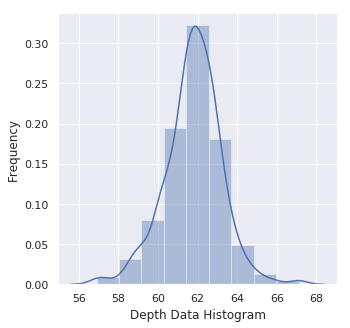



2-) Analizando el histograma graficado, se observa que los datos siguen muy de cerca una distribución normal.
Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.



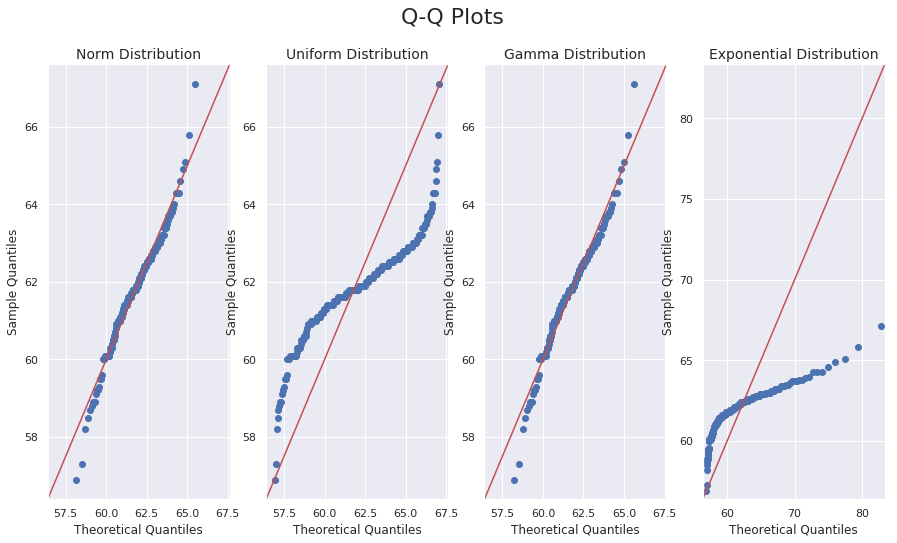



Analizando los gráficos Q-Q, se observa como en las gráficas de la distribución normal y de la distribución gamma
los datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.
Como el histograma anterior parecio mostrar una distribución normal, la distribución candidata va a ser la distribución normal.

3-)Los parametros obtenidos asumiendo una distribución normal son: media=61.788000, desviacion_estandar=1.421392
Graficando la PDF de la distribución normal asumida en conjunto con el histograma se observa a continuación. 


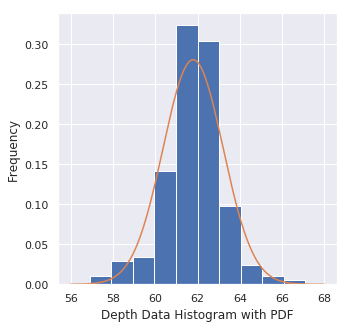


4-)Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: 
p value for norm Distribution is: 0.172441
D value for norm Distribution is: 0.077437

Analizando el valor obtenido de p=0.172441, se observa que al ser mayor que el valor de alpha=0.050000, 
se asume que la hipotesis de que el histograma fuera generado de una distribución normal sea cierta.

5-)El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para
para ver cual es la que mejor describe los datos.

Ahora se muestra de manera ordenada las distribuciones que mejor describen los datos analizados.
La primera columna corresponde a la distribución y la segunda corresponde al valor de p obtenido luego de aplicar la prueba KS.
('norm', 0.1724409271539458)
('gamma', 0.09886433982875573)
('uniform', 4.293740886776377e-14)
('exponential', 1.3642903767492302e-28)

Por lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajusta
a 

In [8]:
# Exercise 1
def plotting_data(data, title):
  # Settings for seaborn plotting style and sizes
  sns.set(color_codes=True)
  sns.set(rc={'figure.figsize':(5,5)})
  
  # Muestro los datos en un histograma (bins = cubetas)
  ax = sns.distplot(data, bins=9, kde=True)
  ax.set(xlabel=title, ylabel='Frequency')
  
  plt.show()
  
def plotting_norm_pdf(data, title, mean, standard_deviation):
  plt.hist(data, density=True)
  plt.xlabel(title)
  plt.ylabel("Frequency")

  # Compute theoretical distribution
  xt = plt.xticks()[0]  
  xmin, xmax = min(xt), max(xt)  
  lnspc = np.linspace(xmin, xmax, len(data))
  
  # Calculate and Plot Norm PDF
  pdf = stats.norm.pdf(lnspc, mean, standard_deviation)
  plt.plot(lnspc, pdf, label="Norm")
  
  plt.show()
  
def analyzing_different_distributions_with_qq_plots(data):
  distribution_names = ["norm", "uniform", "expon", "gamma"]
  
  # Define Plots Settings
  fig, ax = plt.subplots(1, 4, figsize=(15, 8))
  fig.suptitle('Q-Q Plots', fontsize=22)
  
  # Q-Q Plot Norm Distribution
  mean, standard_deviation = stats.norm.fit(data)
  sm.ProbPlot(np.array(data), stats.norm, loc=mean, scale=standard_deviation).qqplot(line='45', ax=ax[0])
  ax[0].set_title('Norm Distribution', fontsize=14)
  
  # Q-Q Plot Uniform Distribution
  mean, standard_deviation = stats.uniform.fit(data)
  sm.ProbPlot(np.array(data), stats.uniform, loc=mean, scale=standard_deviation).qqplot(line='45', ax=ax[1])
  ax[1].set_title('Uniform Distribution', fontsize=14)
  
  # Q-Q Plot Gamma Distribution
  alpha, loc, beta = stats.gamma.fit(data)
  sm.ProbPlot(np.array(data), stats.gamma, distargs=(alpha, ), loc=loc, scale=beta).qqplot(line='45', ax=ax[2])
  ax[2].set_title('Gamma Distribution', fontsize=14)
  
  # Q-Q Plot Exponential Distribution
  loc, scale = stats.expon.fit(data)
  sm.ProbPlot(np.array(data), stats.expon, loc=loc, scale=scale).qqplot(line='45', ax=ax[3])
  ax[3].set_title('Exponential Distribution', fontsize=14)
  
  plt.show()
    
def read_dataset_from_csv():
  def print_dataset(dataset):
    # Set options to show complete dataset columns and rows
    pd.set_option('display.max_columns', None)  
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', -1)
    print(dataset)
    
  # Set CSV Path
  diamonds_dataset_path = 'https://raw.githubusercontent.com/fmejias/CienciasDeLosDatosTEC/master/Estadistica/TP2/datasetTarea2_v2.csv'
  
  # Read the dataset from csv
  diamonds_dataset = pd.read_csv(diamonds_dataset_path, header=0)
  
  return diamonds_dataset

def apply_ks_test(data, distribution_name, print_values=True):
  # Using Scipy to calculate KS
  distribution = getattr(stats, distribution_name)
  distribution_parameters = distribution.fit(data)
  
  # Applying the Kolmogorov-Smirnov test
  D, p = stats.kstest(data, distribution_name, args=distribution_parameters)
  if print_values:
    print("p value for %s Distribution is: %f" % (distribution_name, p))
    print("D value for %s Distribution is: %f" % (distribution_name, D))
  return D, p

def analyzing_different_distributions_with_ks(data):
  D1, p1 = apply_ks_test(data, distribution_name='norm', print_values=False)
  D2, p2 = apply_ks_test(data, distribution_name='uniform', print_values=False)
  D3, p3 = apply_ks_test(data, distribution_name='gamma', print_values=False)
  D4, p4 = apply_ks_test(data, distribution_name='expon', print_values=False)
  
  # Order p-list
  p_list = [('norm', p1), ('uniform', p2), ('gamma', p3), ('exponential', p4)]
  from operator import itemgetter
  p_list.sort(reverse = True, key=itemgetter(1))
  print("Ahora se muestra de manera ordenada las distribuciones que mejor describen los datos analizados.\nLa primera columna corresponde a la distribución y la segunda corresponde al valor de p obtenido luego de aplicar la prueba KS.")
  print(*p_list, sep = "\n")

def exercise_with_depth_column():
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()
  
  # Choose Depth as quantitative variable
  print("\nPrimer Análisis: Se escogió la variable cuantitativa Depth.")
  
  # Print Depth Data
  depth_data = diamonds_dataset['depth'].values.tolist()
  print("Depth data: ", depth_data)
  
  # Plot histogram
  print("\n1-) El primer paso es graficar el histograma de la variable Depth.\n")
  plotting_data(depth_data, 'Depth Data Histogram')
  
  # Distribucion Propuesta
  print("\n\n2-) Analizando el histograma graficado, se observa que los datos siguen muy de cerca una distribución normal.")
  print("Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.\n")
  
  # Analyzing the chosen distribution using a q-q Plot
  analyzing_different_distributions_with_qq_plots(depth_data)
  print("\n\nAnalizando los gráficos Q-Q, se observa como en las gráficas de la distribución normal y de la distribución gamma\nlos datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.")
  print("Como el histograma anterior parecio mostrar una distribución normal, la distribución candidata va a ser la distribución normal.")
  
  # Getting Normal Distribution Parameters
  mean = np.mean(depth_data)
  standard_deviation = np.std(depth_data)
  print("\n3-) Los parametros obtenidos asumiendo una distribución normal son: media=%f, desviacion_estandar=%f" % (mean, standard_deviation))
  
  # Plot PDF with Histogram
  print("Graficando la PDF de la distribución normal asumida en conjunto con el histograma se observa a continuación. ")
  plotting_norm_pdf(depth_data, 'Depth Data Histogram with PDF', mean, standard_deviation)
  
  # Apply KS Test to Depth Data
  print("\n4-) Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: ")
  D, p = apply_ks_test(depth_data, distribution_name='norm')
  print("\nAnalizando el valor obtenido de p=%f, se observa que al ser mayor que el valor de alpha=%f, \nse asume que la hipotesis de que el histograma fuera generado de una distribución normal sea cierta." % (p, 0.05))
  
  
  # Apply KS Test to Depth Data comparing other distributions
  print("\n5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para\npara ver cual es la que mejor describe los datos.\n")
  analyzing_different_distributions_with_ks(depth_data)
  print("\nPor lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajusta\na los datos es la distribución normal.")
  
# Test exercise using Depth column
exercise_with_depth_column()

# 2) Utilizando la columna Carat (Weight of the diamond)




Segundo Análisis: Se escogió la variable cuantitativa Carat(Weight of the diamond).
Carat data:  [0.32, 1.5, 0.38, 0.53, 0.55, 0.52, 0.51, 0.37, 1.06, 0.41, 1.0, 1.02, 0.52, 0.55, 1.05, 0.28, 0.7, 0.27, 1.2, 0.34, 2.01, 0.38, 0.4, 0.41, 1.52, 1.01, 0.41, 1.54, 0.33, 0.34, 1.06, 0.36, 0.35, 0.5, 0.41, 0.39, 0.31, 0.91, 1.71, 0.41, 0.35, 0.31, 0.52, 1.08, 0.54, 2.3, 1.0, 0.9, 0.3, 1.04, 0.9, 0.5, 0.52, 0.71, 0.52, 0.95, 1.0, 0.41, 2.53, 0.46, 0.41, 0.7, 0.8, 0.51, 1.04, 1.22, 0.91, 0.51, 0.63, 2.03, 1.04, 1.53, 2.2, 1.14, 0.6, 0.45, 0.33, 0.42, 0.76, 0.9, 0.74, 1.01, 0.3, 0.32, 0.33, 0.71, 0.32, 0.7, 0.51, 0.31, 0.33, 0.7, 1.15, 1.01, 0.73, 1.59, 1.98, 0.35, 1.76, 1.16, 1.01, 0.3, 0.3, 0.52, 1.07, 1.01, 1.04, 0.32, 0.31, 0.4, 0.36, 0.38, 0.63, 0.46, 2.01, 1.32, 0.38, 0.33, 0.3, 0.5, 1.31, 0.41, 0.79, 0.73, 0.7, 1.9, 0.91, 0.7, 1.01, 0.42, 1.02, 1.5, 0.91, 1.51, 0.71, 0.43, 0.37, 0.9, 0.51, 1.12, 0.44, 0.3, 0.7, 0.9, 2.13, 1.1, 0.73, 0.32, 0.32, 1.0, 0.71, 1.27, 0.71, 1.25, 0.72, 0.7, 0.

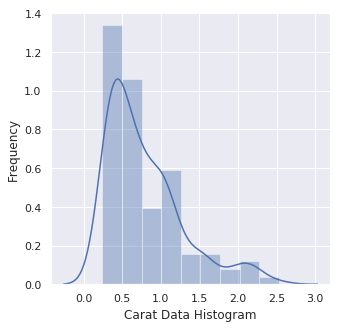



2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución exponencial.
Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.



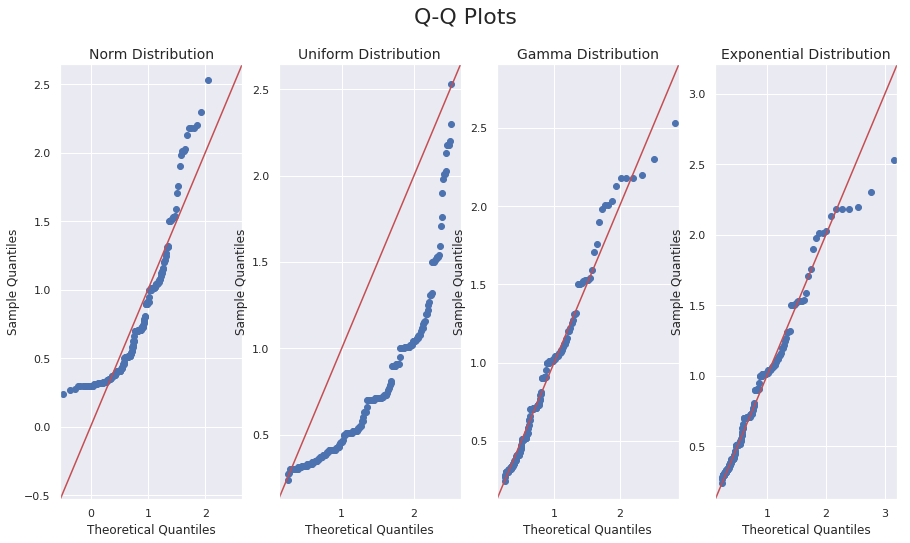



Analizando los gráficos Q-Q, se observa como en las gráficas de la distribución gamma y de la distribución exponencial
los datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.
Como el histograma anterior parecio mostrar una distribución exponencial, la distribución candidata va a ser la distribución exponencial.

3-) Los parametros obtenidos asumiendo una distribución exponencial son: mean=0.788450, variance=0.300797, lambda=1.823320
Graficando la PDF de la distribución exponencial asumida en conjunto con el histograma se observa a continuación. 


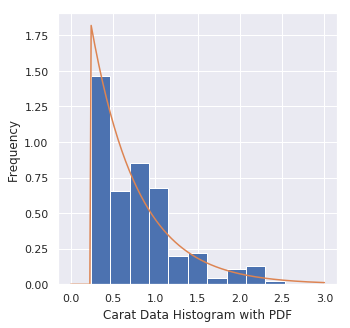


4-) Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: 
p value for expon Distribution is: 0.081270
D value for expon Distribution is: 0.088628

Analizando el valor obtenido de p=0.081270, se observa que al ser mayor que el valor de alpha=0.050000, 
se asume que la hipotesis de que el histograma fuera generado de una distribución exponencial sea cierta.

5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para
para ver cual es la que mejor describe los datos.

Ahora se muestra de manera ordenada las distribuciones que mejor describen los datos analizados.
La primera columna corresponde a la distribución y la segunda corresponde al valor de p obtenido luego de aplicar la prueba KS.
('gamma', 0.2575342191604325)
('exponential', 0.0812695442000152)
('norm', 0.0001613207090175375)
('uniform', 2.604991609925675e-36)

Aquí se observa algo importante, y es que de esas distribuciones la que mejor se a

In [22]:
def plotting_exponential_pdf(data, title, loc, scale):
  plt.hist(data, density=True)
  plt.xlabel(title)
  plt.ylabel("Frequency")

  # Compute theoretical distribution
  xt = plt.xticks()[0]  
  xmin, xmax = min(xt), max(xt)  
  lnspc = np.linspace(xmin, xmax, len(data))
  
  # Calculate and Plot Exponential PDF
  pdf = stats.expon.pdf(lnspc, loc, scale)
  plt.plot(lnspc, pdf, label="Exponential")
  
  plt.show()
  
def exercise_with_carat_column():
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()
  
  # Choose Carat as quantitative variable
  print("\nSegundo Análisis: Se escogió la variable cuantitativa Carat(Weight of the diamond).")
  
  # Print Carat Data
  carat_data = diamonds_dataset['carat'].values.tolist()
  print("Carat data: ", carat_data)
  
  # Plot histogram
  print("\n1-) El primer paso es graficar el histograma de la variable Carat.\n")
  plotting_data(carat_data, 'Carat Data Histogram')
  
  # Distribucion Propuesta
  print("\n\n2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución exponencial.")
  print("Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.\n")
  
  # Analyzing the chosen distribution using a q-q Plot
  analyzing_different_distributions_with_qq_plots(carat_data)
  print("\n\nAnalizando los gráficos Q-Q, se observa como en las gráficas de la distribución gamma y de la distribución exponencial\nlos datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.")
  print("Como el histograma anterior parecio mostrar una distribución exponencial, la distribución candidata va a ser la distribución exponencial.")
  
  # Getting Exponential Distribution Parameters
  loc, scale = stats.expon.fit(carat_data)
  lambda_expon = 1/scale
  mean = stats.expon.mean(loc, scale)
  variance = stats.expon.var(loc, scale)
  print("\n3-) Los parametros obtenidos asumiendo una distribución exponencial son: mean=%f, variance=%f, lambda=%f" % (mean, variance, lambda_expon))
  
  # Plot PDF with Histogram
  print("Graficando la PDF de la distribución exponencial asumida en conjunto con el histograma se observa a continuación. ")
  plotting_exponential_pdf(carat_data, 'Carat Data Histogram with PDF', loc, scale)
  
  # Apply KS Test to Depth Data
  print("\n4-) Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: ")
  D, p = apply_ks_test(carat_data, distribution_name='expon')
  print("\nAnalizando el valor obtenido de p=%f, se observa que al ser mayor que el valor de alpha=%f, \nse asume que la hipotesis de que el histograma fuera generado de una distribución exponencial sea cierta." % (p, 0.05))
  
  # Apply KS Test to Depth Data comparing other distributions
  print("\n5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para\npara ver cual es la que mejor describe los datos.\n")
  analyzing_different_distributions_with_ks(carat_data)
  print("\nAquí se observa algo importante, y es que de esas distribuciones la que mejor se ajusta\na los datos es la distribución gamma.")
  print("La cual era una de las distribuciones que también se ajustaba bien a los datos, y por tanto\ndescribe mejor los datos que la distribución exponencial.")
  
# Test exercise using Carat column
exercise_with_carat_column()



# 3) Utilizando la columna X (Length in mm)



\Tercer Análisis: Se escogió la variable cuantitativa X(Length in mm).
X data:  [4.38, 7.19, 4.65, 5.17, 5.3, 5.12, 5.11, 4.7, 6.54, 4.76, 6.4, 6.51, 5.21, 5.29, 6.59, 4.18, 5.8, 4.16, 6.83, 4.45, 8.26, 4.64, 4.81, 4.72, 7.18, 6.41, 4.79, 7.41, 4.42, 4.48, 6.55, 4.57, 4.53, 5.02, 4.75, 4.64, 4.32, 6.09, 7.55, 4.8, 4.56, 4.35, 5.19, 6.55, 5.24, 8.45, 6.37, 6.16, 4.28, 6.59, 6.15, 5.08, 5.12, 5.89, 5.18, 6.37, 6.41, 4.8, 8.54, 4.91, 4.78, 5.59, 5.93, 5.13, 6.51, 6.86, 6.2, 5.08, 5.53, 8.08, 6.39, 7.36, 8.3, 6.82, 5.5, 4.94, 4.42, 4.79, 5.82, 6.05, 5.8, 6.43, 4.3, 4.36, 4.45, 5.68, 4.43, 5.73, 5.12, 4.4, 4.52, 5.68, 6.78, 6.38, 5.81, 7.52, 8.04, 4.51, 7.84, 6.83, 6.39, 4.3, 4.23, 5.2, 6.59, 6.57, 6.65, 4.42, 4.34, 4.65, 4.59, 4.67, 5.47, 4.93, 8.05, 7.07, 4.68, 4.47, 4.32, 5.11, 7.09, 4.76, 5.9, 5.7, 5.71, 7.57, 6.1, 5.55, 6.39, 4.74, 6.42, 7.4, 6.14, 7.28, 5.8, 4.87, 4.58, 6.15, 5.08, 6.59, 4.86, 4.22, 5.76, 6.28, 8.43, 6.59, 5.78, 4.41, 4.45, 6.45, 5.75, 6.92, 5.66, 6.88, 5.8, 5.65, 5.6

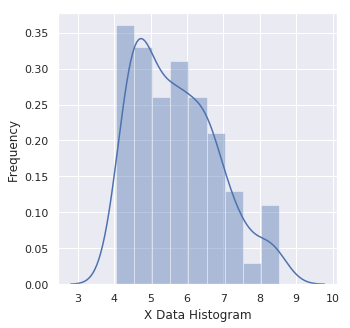



2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución gamma.
Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.


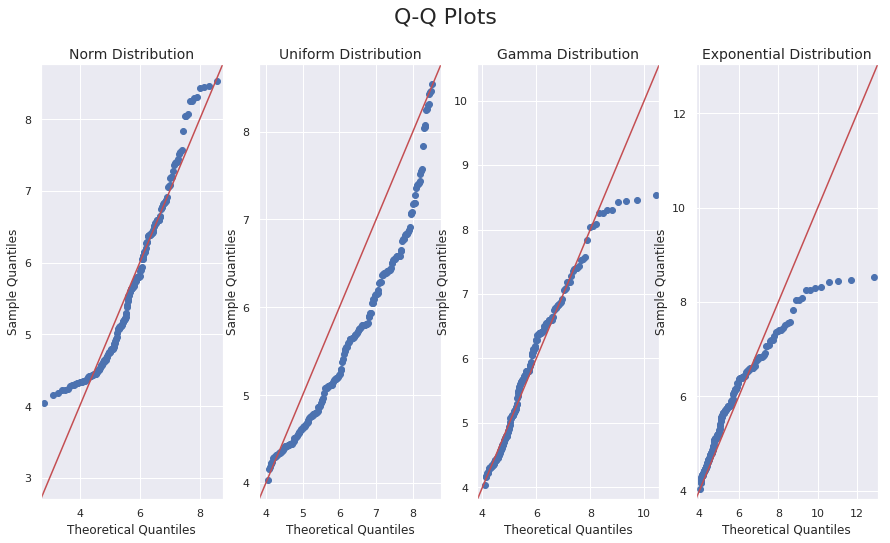



Analizando los gráficos Q-Q, se observa como en las gráficas de la distribución gamma y norm
los datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.
Como el histograma anterior parecio mostrar una distribución gamma, la distribución candidata va a ser la distribución gamma.

3-) Los parametros obtenidos asumiendo una distribución gamma son: alpha=1.923858, beta=0.882253, mean=5.703430, variance=1.497474

Graficando la PDF de la distribución gamma asumida en conjunto con el histograma se observa a continuación. 


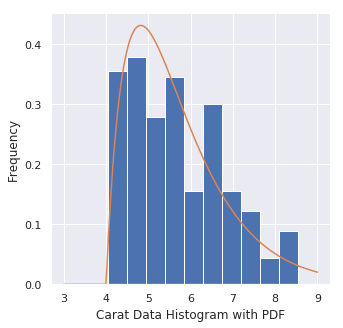


4-) Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: 
p value for gamma Distribution is: 0.140455
D value for gamma Distribution is: 0.080643

Analizando el valor obtenido de p=0.140455, se observa que al ser mayor que el valor de alpha=0.050000, 
se asume que la hipotesis de que el histograma fuera generado de una distribución gamma sea cierta.

5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para
para ver cual es la que mejor describe los datos.

Ahora se muestra de manera ordenada las distribuciones que mejor describen los datos analizados.
La primera columna corresponde a la distribución y la segunda corresponde al valor de p obtenido luego de aplicar la prueba KS.
('gamma', 0.14045457133065442)
('norm', 0.032854141417751954)
('exponential', 0.0043554287261305304)
('uniform', 1.7620631356192436e-10)

Por lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajus

In [31]:
def plotting_gamma_pdf(data, title, alpha, loc, beta):
  plt.hist(data, density=True)
  plt.xlabel(title)
  plt.ylabel("Frequency")

  # Compute theoretical distribution
  xt = plt.xticks()[0]  
  xmin, xmax = min(xt), max(xt)  
  lnspc = np.linspace(xmin, xmax, len(data))
  
  # Calculate and Plot Gamma PDF
  pdf = stats.gamma.pdf(lnspc, alpha, loc, beta)
  plt.plot(lnspc, pdf, label="Gamma")
  
  plt.show()

def exercise_with_x_column():
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()
  
  # Choose X as quantitative variable
  print("Tercer Análisis: Se escogió la variable cuantitativa X(Length in mm).")
  
  # Print X Data
  x_data = diamonds_dataset['x'].values.tolist()
  print("X data: ", x_data)
  
  # Plot histogram
  print("\n1-) El primer paso es graficar el histograma de la variable X(Length in mm).\n")
  plotting_data(x_data, 'X Data Histogram')
  
  # Distribucion Propuesta
  print("\n\n2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución gamma.")
  print("Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.")
  
  # Analyzing the chosen distribution using a q-q Plot
  analyzing_different_distributions_with_qq_plots(x_data)
  print("\n\nAnalizando los gráficos Q-Q, se observa como en las gráficas de la distribución gamma y norm\nlos datos siguen la línea recta y por tanto se aproximan más a esas distribuciones.")
  print("Como el histograma anterior parecio mostrar una distribución gamma, la distribución candidata va a ser la distribución gamma.")
  
  # Getting Gamma Distribution Parameters
  alpha, loc, beta = stats.gamma.fit(x_data)
  mean = stats.gamma.mean(alpha, loc, beta)
  variance = stats.gamma.var(alpha, loc, beta)
  print("\n3-) Los parametros obtenidos asumiendo una distribución gamma son: alpha=%f, beta=%f, mean=%f, variance=%f" % (alpha, beta, mean, variance))
  
  # Plot PDF with Histogram
  print("\nGraficando la PDF de la distribución gamma asumida en conjunto con el histograma se observa a continuación. ")
  plotting_gamma_pdf(x_data, 'Carat Data Histogram with PDF', alpha, loc, beta)
  
  # Apply KS Test to Depth Data
  print("\n4-) Ahora, el siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: ")
  D, p = apply_ks_test(x_data, distribution_name='gamma')
  print("\nAnalizando el valor obtenido de p=%f, se observa que al ser mayor que el valor de alpha=%f, \nse asume que la hipotesis de que el histograma fuera generado de una distribución gamma sea cierta." % (p, 0.05))
  
  # Apply KS Test to Depth Data comparing other distributions
  print("\n5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para\npara ver cual es la que mejor describe los datos.\n")
  analyzing_different_distributions_with_ks(x_data)
  print("\nPor lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajusta\na los datos es la distribución gamma.")
  
  
# Test exercise using X column
exercise_with_x_column()


# 4) Utilizando la columna Y (Width in mm)



\Cuarto Análisis: Se escogió la variable cuantitativa Y(Width in mm).
Y data:  [4.35, 7.32, 4.7, 5.21, 5.36, 5.06, 5.14, 4.76, 6.45, 4.79, 6.47, 6.56, 5.17, 5.24, 6.55, 4.2, 5.82, 4.18, 6.9, 4.44, 8.21, 4.67, 4.84, 4.75, 7.11, 6.44, 4.83, 7.49, 4.45, 4.53, 6.59, 4.63, 4.52, 5.04, 4.76, 4.71, 4.3, 6.18, 7.47, 4.78, 4.52, 4.38, 5.17, 6.58, 5.22, 8.48, 6.44, 6.12, 4.25, 6.66, 6.23, 5.12, 5.16, 5.84, 5.22, 6.35, 6.49, 4.76, 8.45, 4.96, 4.8, 5.49, 6.0, 5.15, 6.55, 6.83, 6.22, 5.04, 5.57, 8.04, 6.33, 7.39, 8.34, 6.88, 5.57, 5.0, 4.46, 4.81, 5.86, 6.1, 5.76, 6.4, 4.27, 4.35, 4.47, 5.74, 4.4, 5.7, 5.15, 4.35, 4.48, 5.72, 6.75, 6.43, 5.87, 7.45, 8.1, 4.55, 7.87, 6.78, 6.3, 4.34, 4.28, 5.23, 6.51, 6.45, 6.59, 4.43, 4.29, 4.69, 4.61, 4.63, 5.51, 4.98, 7.97, 7.13, 4.62, 4.49, 4.29, 5.05, 7.15, 4.77, 5.85, 5.75, 5.76, 7.52, 6.12, 5.54, 6.34, 4.78, 6.33, 7.25, 6.09, 7.31, 5.85, 4.85, 4.55, 6.18, 5.13, 6.63, 4.82, 4.25, 5.79, 6.24, 8.37, 6.54, 5.81, 4.35, 4.41, 6.41, 5.78, 6.87, 5.72, 6.93, 5.84, 5.6

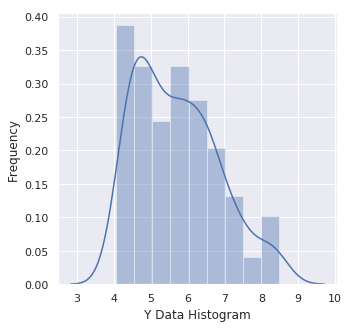



2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución gamma.
Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.


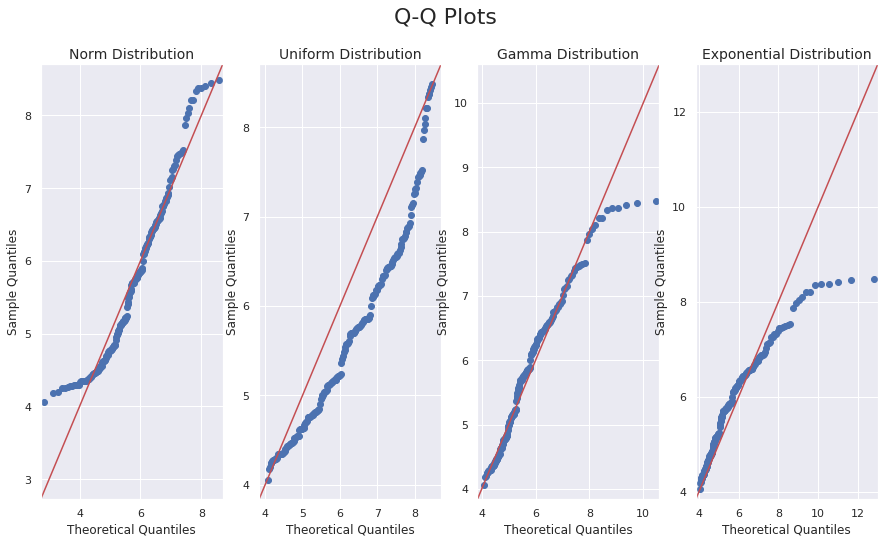


Analizando los gráficos Q-Q, se observa como los datos siguen la línea recta de la distribución gamma
y por tanto se aproximan más a una distribución gamma.
Por tanto la distribución candidata va a ser la distribución gamma.

3-) Los parametros obtenidos asumiendo una distribución gamma son: alpha=1.880054, beta=0.895266, mean=5.711188, variance=1.506866

Graficando la PDF de la distribución gamma asumida en conjunto con el histograma se observa a continuación. 


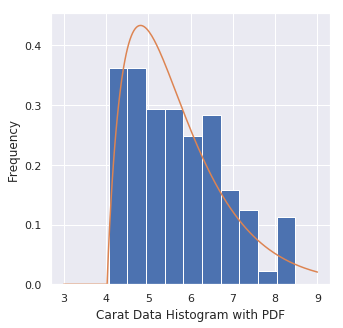


4-) El siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: 
p value for gamma Distribution is: 0.072041
D value for gamma Distribution is: 0.090292

Analizando el valor obtenido de p=0.072041, se observa que al ser mayor que el valor de alpha=0.050000, 
se asume que la hipotesis de que el histograma fuera generado de una distribución gamma sea cierta.

5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para
para ver cual es la que mejor describe los datos.

Ahora se muestra de manera ordenada las distribuciones que mejor describen los datos analizados.
La primera columna corresponde a la distribución y la segunda corresponde al valor de p obtenido luego de aplicar la prueba KS.
('gamma', 0.07204094737576007)
('norm', 0.016320697658860506)
('exponential', 0.00261927415746872)
('uniform', 1.3765893965326858e-09)

Por lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajusta
a los 

In [32]:

  
def exercise_with_y_column():
  # Set Diamonds Dataset
  diamonds_dataset = read_dataset_from_csv()
  
  # Choose Y as quantitative variable
  print("\Cuarto Análisis: Se escogió la variable cuantitativa Y(Width in mm).")
  
  # Print Y Data
  y_data = diamonds_dataset['y'].values.tolist()
  print("Y data: ", y_data)
  
  # Plot histogram
  print("\n1-) El primer paso es graficar el histograma de la variable Y(Width in mm).\n")
  plotting_data(y_data, 'Y Data Histogram')
  
  # Distribucion Propuesta
  print("\n\n2-) Analizando el histograma graficado, se observa que los datos parecen seguir una distribución gamma.")
  print("Para lograr escoger una distribución candidata, voy a utilizar los siguientes diagramas Q-Q.")
  
  # Analyzing the chosen distribution using a q-q Plot
  analyzing_different_distributions_with_qq_plots(y_data)
  print("\nAnalizando los gráficos Q-Q, se observa como los datos siguen la línea recta de la distribución gamma\ny por tanto se aproximan más a una distribución gamma.")
  print("Por tanto la distribución candidata va a ser la distribución gamma.")
  
  # Getting Gamma Distribution Parameters
  alpha, loc, beta = stats.gamma.fit(y_data)
  mean = stats.gamma.mean(alpha, loc, beta)
  variance = stats.gamma.var(alpha, loc, beta)
  print("\n3-) Los parametros obtenidos asumiendo una distribución gamma son: alpha=%f, beta=%f, mean=%f, variance=%f" % (alpha, beta, mean, variance))
  
  # Plot PDF with Histogram
  print("\nGraficando la PDF de la distribución gamma asumida en conjunto con el histograma se observa a continuación. ")
  plotting_gamma_pdf(y_data, 'Carat Data Histogram with PDF', alpha, loc, beta)
  
  # Apply KS Test to Y Data
  print("\n4-) El siguiente paso es aplicar la prueba KS, la cual retorna los siguientes valores de p y D: ")
  D, p = apply_ks_test(y_data, distribution_name='gamma')
  print("\nAnalizando el valor obtenido de p=%f, se observa que al ser mayor que el valor de alpha=%f, \nse asume que la hipotesis de que el histograma fuera generado de una distribución gamma sea cierta." % (p, 0.05))
  
  # Apply KS Test to Y Data comparing other distributions
  print("\n5-) El paso final va a ser aplicar KS a las distribuciones Normal, Uniforme, Exponencial y Gamma para\npara ver cual es la que mejor describe los datos.\n")
  analyzing_different_distributions_with_ks(y_data)
  print("\nPor lo tanto se termina de confirmar que de esas distribuciones la que mejor se ajusta\na los datos es la distribución gamma.")
  
  
  
  
# Test exercise using Y column
exercise_with_y_column()
